# Breast cancer diagnostic

Attribute Information:

 - 1) ID number 
 - 2) Diagnosis (M = malignant, B = benign) 
 
 - 3-32.Ten real-valued features are computed for each cell nucleus:

     - a) radius (mean of distances from center to points on the perimeter) 
     - b) texture (standard deviation of gray-scale values) 
     - c) perimeter 
     - d) area 
     - e) smoothness (local variation in radius lengths) 
     - f) compactness (perimeter^2 / area - 1.0) 
     - g). concavity (severity of concave portions of the contour) 
     - h). concave points (number of concave portions of the contour) 
     - i). symmetry 
     - j). fractal dimension ("coastline approximation" - 1)

The **mean**, **standard error** and **"worst"** or **largest** (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

## Load libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # for the check the error and accuracy of the model

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dhminh1024/ML_datasets/master/breast-cancer-data.csv")

data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Now lets look at the data

In [3]:
# Show columns info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Here we can see the data is divided in three parts: first is Mean (3-13),  Stranded Error(13-23) and  Worst(23-32) and each contain 10 parameters:
    - radius 
    - texture
    - area
    - perimeter
    - smoothness
    - compactness
    - concavity
    - concave points
    - symmetry
    - fractal dimension
    
    
Now we can see Unnamed:32 have **0 non-null object** it means that all values are null in this column so we cannot use this column for our analysis.

Let drop this column *Unnamed: 32* and we don't need to column *id* as well.

In [4]:
data1 = data.drop("Unnamed: 32", axis=1)
# here axis 1 means we are droping the column
data1.drop("id", axis=1, inplace=True) # in this process this will change in our data itself 

data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data1['diagnosis'].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [6]:
# Now data can be divided into three parts.lets divide the features according to their categories
features_mean = list(data1.columns[1:11])
features_se = list(data1.columns[11:20])
features_worst = list(data1.columns[21:31])

print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [7]:
# Our diagnosis column is an object type (string) so we can map it to integer value
data1['diagnosis'] = data1['diagnosis'].map({'M':1, 'B':0})
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Statistically Exploring Dataset

In [8]:
data1.describe() # this will describe the all statistical function of our data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Histogram
- How many times each value appears in dataset. This description is called the distribution of variable
- Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
- Frequency = number of times each value appears
- Example: [1,1,1,1,2,2,2]. Frequency of 1 is four and frequency of 2 is three.

In [9]:
def plotHist(feature, data):
    plt.figure(figsize = (7,7))
    plt.hist(data[data["diagnosis"] == 1][feature], bins=30, fc=(1,0,0,0.5), label="Malignant")
    plt.hist(data[data["diagnosis"] == 0][feature], bins=30, fc=(0,0,1,0.5), label="Benign")
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title("Histogram of " + feature + " for Benign and Malignant Tumors")
    plt.show()

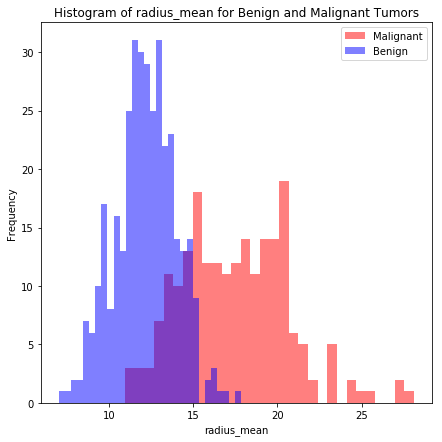

In [10]:
plotHist('radius_mean', data1)

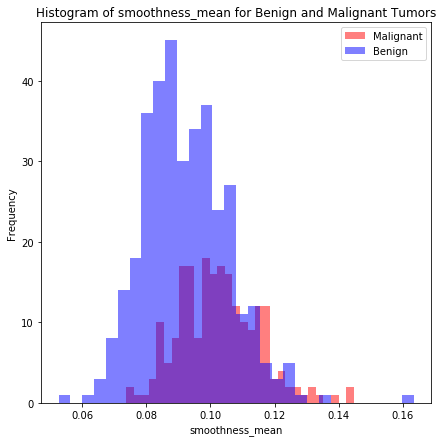

In [11]:
plotHist('smoothness_mean', data1)
# observe: not as good a feature to identify a linear separation

### Conclusions from the Histogram
- A good feature will show that we can distinguish information of Malignant and Benign explicitly (ex: radius_mean)
- A bad feature will not help us distinugish the label (ex: smoothness_mean)

Other conclusions:
- From this graph you can see that **radius mean** of malignant tumors are bigger than radius mean of benign tumors mostly.
- The benign distribution (purple in graph) of **radius_mean** is approximately bell-shaped that is shape of normal distribution (gaussian distribution)
- Also you can find result like that most frequent malignant **radius mean** is 20

### Calculate Outliers
While looking histogram as you can see there are rare values in benign distribution (purple in graph)
- There values can be errors or rare events.
- These errors and rare events can be called outliers.

Calculating outliers:

- First we need to calculate first quartile **(Q1)(25%)**
- Then find **IQR (Inter Quartile Range) = Q3 - Q1**
- Finally compute 
    - **Lower Bound = Q1 - 1.5 x IQR** 
    - **Upper Bound = Q3 + 1.5 x IQR**
- Anything outside this range is an **Outlier**

Let's write the code for Benign tumor distribution for feature **radius_mean**

In [12]:
data_benign = data1[data1["diagnosis"] == 0]
data_malignant = data1[data1["diagnosis"] == 1]
desc = data_benign.radius_mean.describe()
desc

count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

In [13]:
Q1 = desc[4] # 25%
Q3 = desc[6] # 75%
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_benign[data_benign.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_benign[(data_benign.radius_mean < lower_bound) | (data_benign.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


### Boxplot - Another way to find Outliers
[Understanding Box Plots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

We can see outliers also from box plots

We found 3 outliers (2 in upper bound and 1 in lower bound) in **benign radius_mean** previously 

In box plot there are also 3 outliers (2 in upper bound and 1 in lower bound) for **benign radius_mean**.

In [14]:
melted_data = pd.melt(data, id_vars="diagnosis", value_vars=['radius_mean', 'texture_mean'])
melted_data.head()

,diagnosis,variable,value
0,M,radius_mean,17.99
1,M,radius_mean,20.57
2,M,radius_mean,19.69
3,M,radius_mean,11.42
4,M,radius_mean,20.29


In [15]:
melted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 3 columns):
diagnosis    1138 non-null object
variable     1138 non-null object
value        1138 non-null float64
dtypes: float64(1), object(2)
memory usage: 26.8+ KB


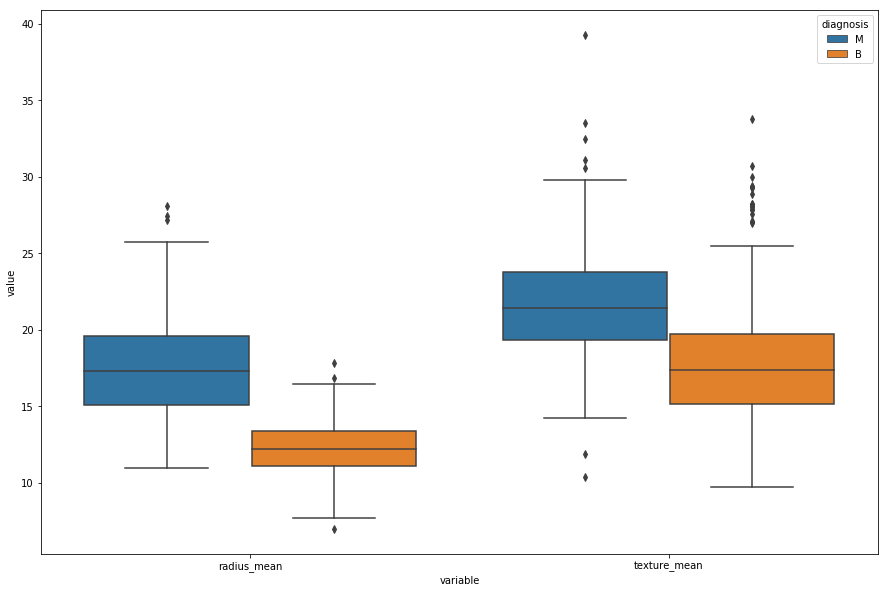

In [16]:
plt.figure(figsize = (15,10))
sns.boxplot(x="variable", y="value", hue="diagnosis", data=melted_data)
plt.show()

### Relationship Between Variables

### Scatter plot - The simplest way for Relationship Between Variables

We can say that two variables are related with each other if one of them gives information about others.

For example, price and distance. If you go long distance with taxi you will pay more. There fore we can say that price and distance are **positively related** with each other.

**Scatter Plot** - Simplest way to check relationship between two variables

Lets look at relationship between **radius_mean** and **area mean**

In scatter plot you can see that when **radius_mean** increases, **area_mean** also increases. Therefore, they are positively correlated with each other.

<Figure size 1080x720 with 0 Axes>

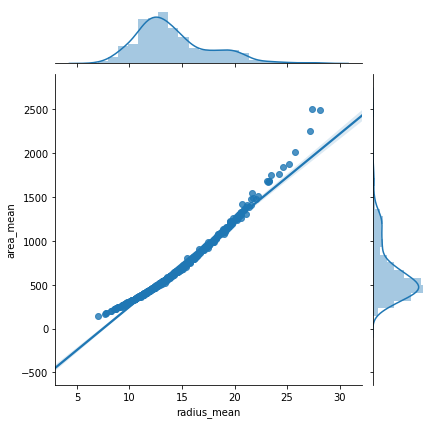

In [17]:
plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean, data.area_mean, kind="regg")
plt.show()

There is no correlation between **area_mean** and **fractal_dimension_se**. Because when **area_mean** changes, **fractal_dimension_se** is not affected by change of **area_mean**.

<Figure size 1080x720 with 0 Axes>

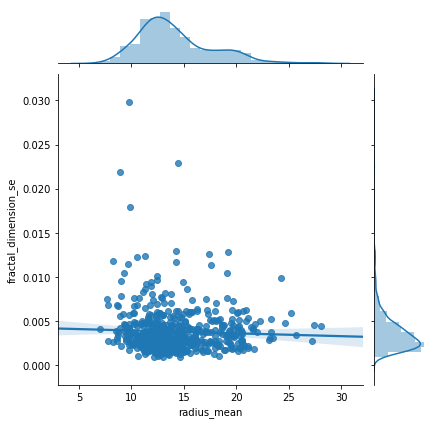

In [18]:
plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean, data.fractal_dimension_se, kind="regg")
plt.show()

## Feature Selections

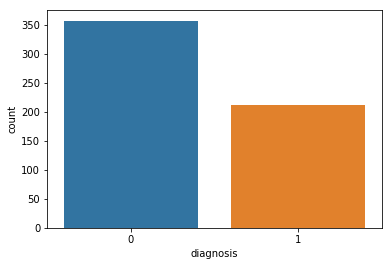

In [19]:
sns.countplot(data1['diagnosis'], label="Count")

Okey, now we have features but what does they mean or actually how much do we need to know about these features The answer is that **we do not need to know meaning of these features**, however, in order to imagine in our mind we should know something like variance, standard deviation, number of sample (count) or max min values. These type of information helps to understand about what is going on data. For example , the question is appeared in my mind the area_mean feature's max value is 2500 and smoothness_mean features' max 0.16340. Therefore do we need standardization or normalization before visualization, feature selection, feature extraction or classification? The answer is yes.

### Visualize the Mean Features
For simplicity, let's just visualize with the Mean feature. The SE and Worst features is the same. 

Solution: We can create a function to draw Box Plots or Swarm Plots and pass Features and Data as arguments.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

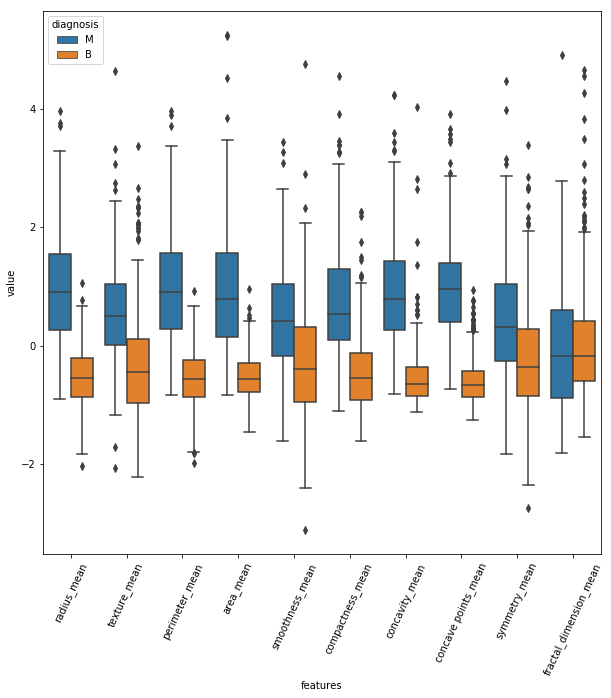

In [20]:
# Box plots are useful in terms of seeing outliers
X = data1.drop('diagnosis',axis = 1 )
X_normalized = (X - X.mean()) / (X.std()) # Standardization

# Visualize mean features only
first_10_features_data = pd.concat([data.diagnosis, X_normalized.iloc[:,0:10]], axis=1)
melted_data = pd.melt(first_10_features_data, id_vars="diagnosis",
                             var_name="features",
                             value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=melted_data)
plt.xticks(rotation=65)

In [30]:
X_normalized

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
5,-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.865540,0.823931,1.004518,1.888343,...,-0.165353,-0.313560,-0.114908,-0.244105,2.046712,1.720103,1.262133,0.905091,1.752527,2.239831
6,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662,...,1.367780,0.322599,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718
7,-0.118413,0.358135,-0.072803,-0.218772,1.602639,1.139100,0.060972,0.281702,1.402121,1.658894,...,0.163619,0.400695,0.099361,0.028834,1.446688,0.724148,-0.021035,0.623647,0.477221,1.724917
8,-0.319885,0.588312,-0.183919,-0.383870,2.199903,1.682529,1.218025,1.149680,1.963872,1.571079,...,-0.161215,0.822090,-0.031581,-0.248145,1.661295,1.816711,1.278909,1.390393,2.387756,1.287517
9,-0.473118,1.104467,-0.329192,-0.508616,1.581308,2.561105,1.737343,0.940932,0.796597,2.780649,...,-0.243975,2.440961,-0.286026,-0.297148,2.318256,5.108382,3.991920,1.618591,2.368360,6.840837


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

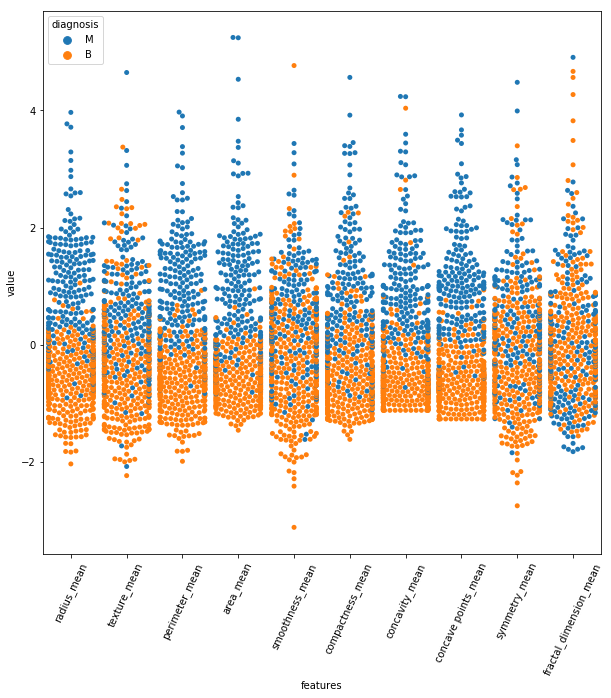

In [21]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=melted_data)
plt.xticks(rotation=65)

Box plots:

- Lets interpret the plot above. For example, in **texture_mean** feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in **fractal_dimension_mean** feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

Swarm plots:
- We can see clearer the variance of data. Main question is: **Which feature looks like more clear in terms of classification?** For instance, texture_mean in last swarm plot looks like malignant and benign are seprated not totally but mostly. Hovewer, **fractal_dimension_mean** in swarm plotlooks like malignant and benign are mixed so it is hard to classfy while using this feature.

Further Exploration:
- Variable of **concavity_worst** and **concave_point_worst** looks like similar but how can we decide whether they are correlated with each other or not. (Not always true but, basically, **if the features are correlated with each other we can drop one of them, because _What is the meaning of using the same feature twice ?_**)

- In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated. Pearson value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

###  What if we want to observe all correlation between features? 
The answer is heatmap - Old but powerful plot method.

Let's draw a heat map to show all the correaltion so that we can remove multi-colinearity. It means that we try to remove the columns that are depending on each other because **What is the meaning of using the same feature twice?**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <a list of 31 Text xticklabel objects>)

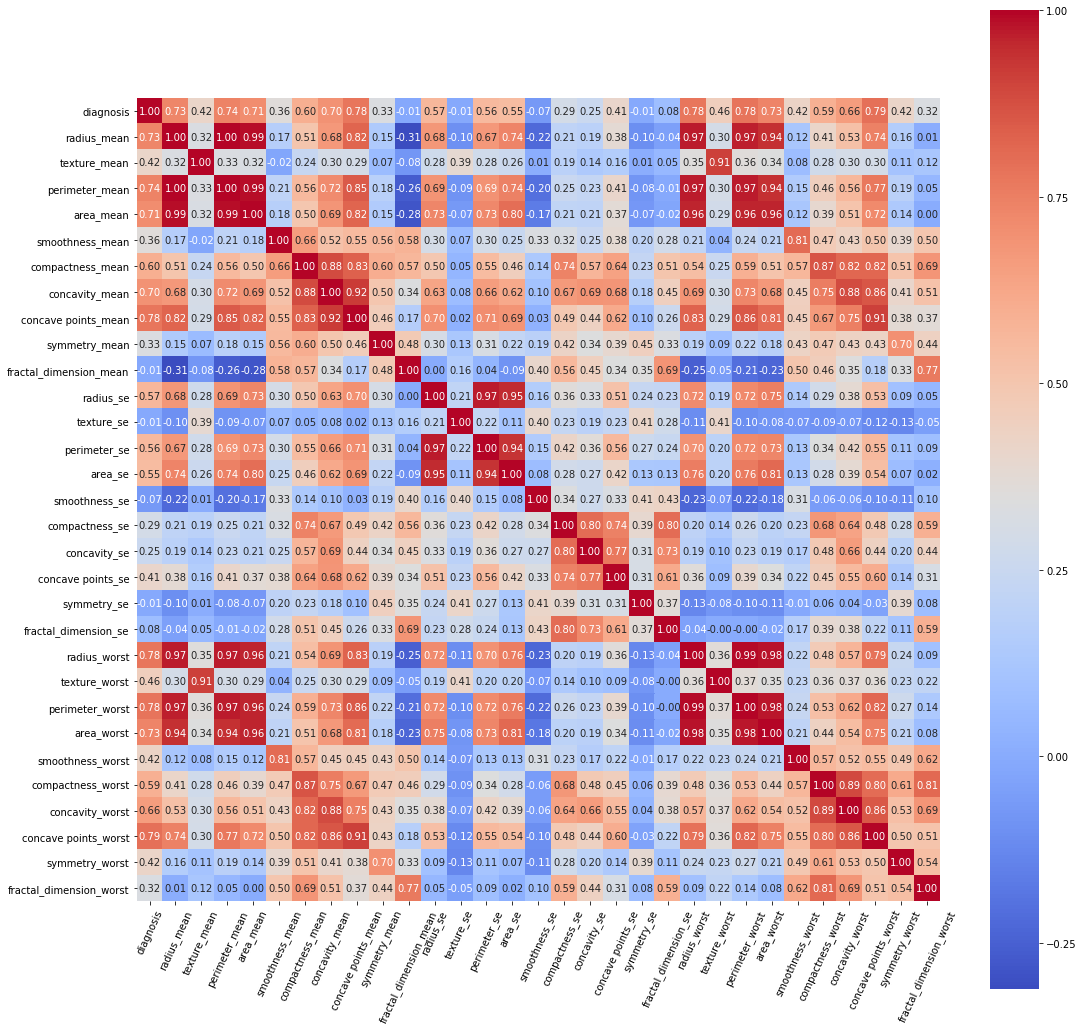

In [22]:
corr = data1.corr() # .corr is used for find corelation
plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=65)

- As it can be seen in map heat figure: **radius_mean**, **perimeter_mean** and **area_mean** are correlated with each other so we will use only **area_mean**. If you ask how i choose **area_mean** as a feature to use, well actually there is no correct answer, I just look at swarm plots and area_mean looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy of classifier.

- **compactness_mean**, **concavity_mean** and **concave_points_mean** are correlated with each other.Therefore I only choose **concavity_mean**. Apart from these, **radius_se, perimeter_se** and **area_se** are correlated and I only use **area_se**. 

- **radius_worst, perimeter_worst** and **area_worst** are correlated so I use **area_worst.**

- **compactness_worst, concavity_worst** and **concave points_worst** so I use **concavity_worst**. 

- **compactness_se**, **concavity_se** and **concave points_se** so I use **concavity_se**. 

- **texture_mean and texture_worst** are correlated and I use **texture_mean**. 

- **area_worst** and **area_mean** are correlated, I use **area_mean**.

In [23]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean',
             'concave points_mean','radius_se','perimeter_se','radius_worst',
             'perimeter_worst','compactness_worst','concave points_worst',
             'compactness_se','concave points_se','texture_worst','area_worst']

# Now these are the variables which will not be used for prediction

In [24]:
final_data = data1.drop(drop_list, axis=1)
final_data.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,1,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,1,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,1,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [25]:
final_data.columns

Index(['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.8 but lets see together what happen if we do not drop it.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text xticklabel objects>)

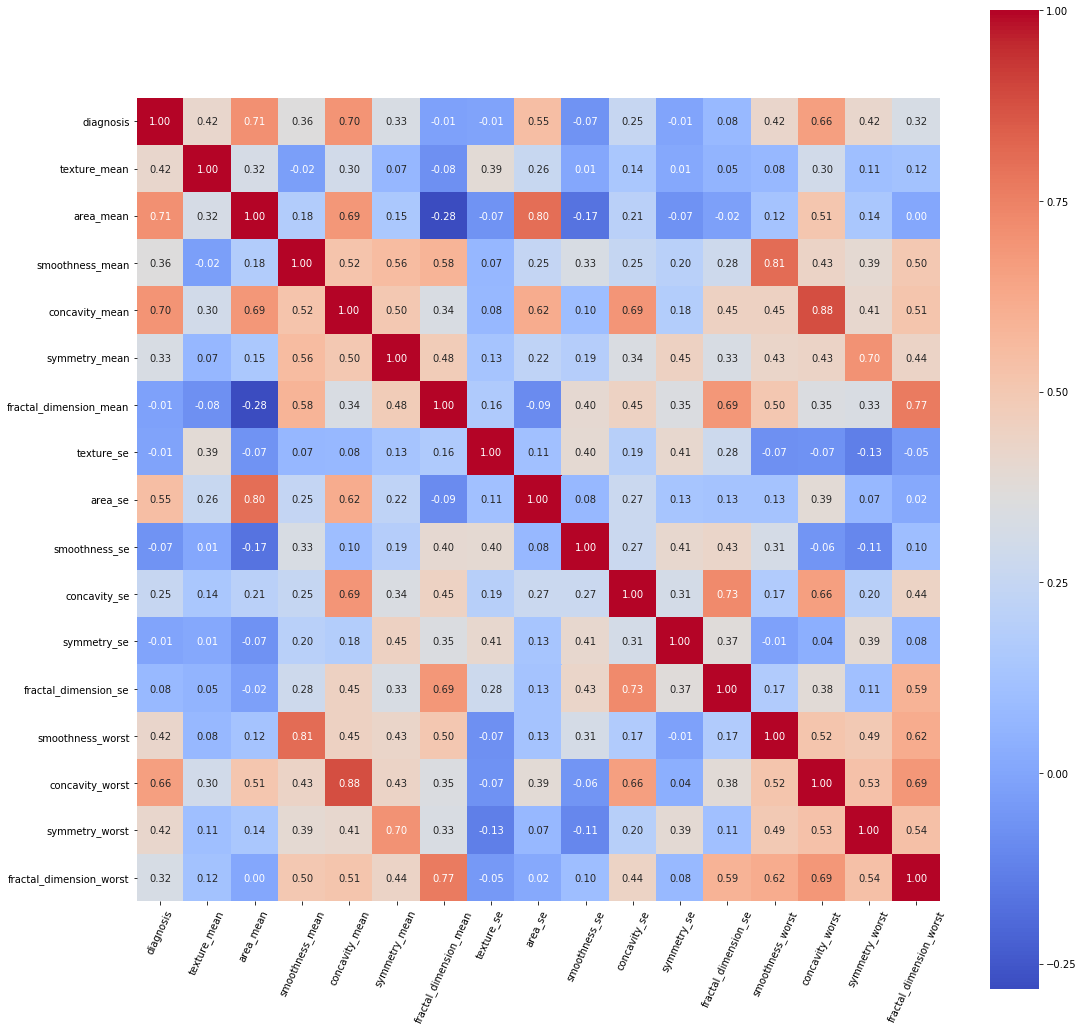

In [26]:
corr = final_data.corr() # .corr is used for find corelation
plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar = True, square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=65)

## Train/Test Splitting and Training Model

In [27]:
#now split the data into train and test
final_X = final_data.drop('diagnosis', axis = 1)
final_y = final_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(final_X, final_y, test_size = 0.3, random_state = 101)# in this our main data is splitted into train and test

# we can check their dimension
print(X_train.shape)
print(X_test.shape)

(398, 16)
(171, 16)


## Evaluating Model

Accuracy: 0.935672514619883


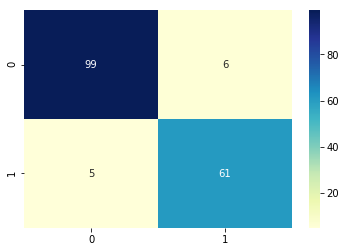

In [31]:
# Using model from sklearn library 
clf = LogisticRegression()

# Fit the model:
clf.fit(X_train, y_train) 

# Make predictions on testing set
predictions = clf.predict(X_test)
predict_proba = clf.predict_proba(X_test)

print ('Accuracy:', accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

In [29]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      0.94      0.95       105
          1       0.91      0.92      0.92        66

avg / total       0.94      0.94      0.94       171



In [37]:
print(predict_proba[:5])
print(predictions[:5])

[[0.94486122 0.05513878]
 [0.73365884 0.26634116]
 [0.91344951 0.08655049]
 [0.02683843 0.97316157]
 [0.96705172 0.03294828]]
[0 0 0 1 0]


## References

- https://www.kaggle.com/kanncaa1/statistical-learning-tutorial-for-beginners
- https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

In [40]:
wrong_y_test = y_test[y_test != predictions]
print('wrong_y_test', wrong_y_test)
wrong_X_test = X_test[y_test != predictions]
# print('wrong X test', wrong_X_test)
wrong_predict_proba = clf.predict_proba(wrong_X_test)
print(wrong_predict_proba[:5])

wrong_y_test 385    1
379    1
466    0
39     1
513    0
225    0
290    0
128    0
89     0
536    1
297    1
Name: diagnosis, dtype: int64
[[0.67607155 0.32392845]
 [0.62781107 0.37218893]
 [0.45433951 0.54566049]
 [0.5380055  0.4619945 ]
 [0.39589098 0.60410902]]
